# Perceptron pour le reconnaissance de chiffres manuscrits

L'objectif de ce TP est de reconnaître des chiffres manuscrits d'une base de test à partir d'une base d'apprentissage et des réseaux de neurones. Les chiffres ont été normalisés et centrés dans une image de taille fixe $28\times 28$ pixels. 

On va travailler sur 2 bases de données de MNIST:
    - Standard: les chiffres manuscrits comprend un ensemble de 60 000 exemples d'apprentissage et un ensemble de 10 000 exemples de test. On va classifier 10 catégories de chiffres par perceptron (mono/multi couche).
    - DeepFake: l'idée est de distinguer les données Générées par un Modèle Générative GAN par apport aux chiffres manuscrits standard. On dispose de 4932x2 exemples d'apprentissage du chiffre 0 avec label real (standard), et label fake (généré). On va évaluer un modèle de classification binaire sur 991x2 exemples de test.

In [10]:
# importer des librairies avec tensorflow==1.15 , keras==2.3.1
import numpy as np
import tensorflow as tf
#from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Librairies et fonctions nécessaires au design des réseaux de neurones
import keras
from keras import layers
from keras import models
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Activation
from keras.models import Model, Sequential


# Chargement des données
### Standard

In [2]:
# Nombre de classes
num_classes = 10

# Chargement base d'apprentissage et de test 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# normalisation 
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# transformation des images (matrices 28 x 28) en vecteur de dimension 784 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]*x_test.shape[2]))
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 784)
60000 train samples
10000 test samples


# Perceptron mono couche
### Standard

In [3]:
# Création de l'architecture 
model = Sequential()
model.add(Dense(10, activation="softmax", input_dim=784))
model.summary()


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Optimisation du modèle 

opt = keras.optimizers.Adam(learning_rate=1e-3) 

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['acc'])

history = model.fit(x_train, y_train,
          epochs=10,
          validation_data=(x_test, y_test),
          batch_size=16)

In [8]:
# Analyse des résultats 

def plot_training_analysis():
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

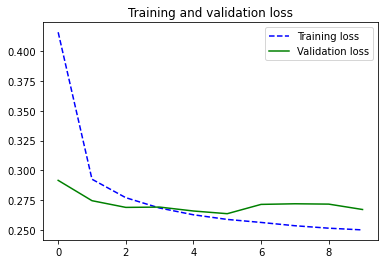

In [9]:
plot_training_analysis()

# Perceptron Multi-couches
### Standard

In [ ]:
# A vous de jouer !

# Chargement des données
### DeepFake

In [ ]:
# Nombre de classes
num_classes = 2

# Utiliser read_real_data et read_fake_data
# dans utils pour charger les donnees
from utils import read_real_data, read_fake_data

x_train_real = read_real_data('real_mnist_digit0_train')
x_train_fake = read_fake_data('fake_mnist_digit0_train')
x_test_real = read_real_data('real_mnist_digit0_val')
x_test_fake = read_fake_data('fake_mnist_digit0_val')

x_train = np.concatenate([x_train_real,x_train_fake],axis=0)
x_test = np.concatenate([x_test_real,x_test_fake],axis=0)

print('x_train',x_train.shape)
print('x_test',x_test.shape)

# Build y_train et y_test for x_train and x_test
# Denote the label real by 0
# Denote the label fake by 1
y_train = np.ones(x_train.shape[0])
# TODO

y_test = np.ones(x_test.shape[0])
# TODO

# Shuffle (a test)
rng_state = np.random.get_state()
arr1 = np.arange(10)
arr2 = np.arange(10)
np.random.shuffle(arr1)
np.random.set_state(rng_state)
np.random.shuffle(arr2)
print(arr1)
print(arr2)

# Shuffle training and test images and labels in a random order (index) 
rng_state = np.random.get_state()
np.random.shuffle(x_train)
np.random.set_state(rng_state)
np.random.shuffle(y_train)

rng_state = np.random.get_state()
np.random.shuffle(x_test)
np.random.set_state(rng_state)
np.random.shuffle(y_test)

# transformation des images (matrices 28 x 28) en vecteur de dimension 784 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]*x_test.shape[2]))
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


In [ ]:
# Visualize une image
img = x_train[0,:].reshape(28,28)
plt.imshow(img)
plt.colorbar()

# Representation d'un label
label = y_test[0]
print(label)

# Perceptron mono couche
### DeepFake

In [1]:
# A vous de jouer !

# Perceptron Multi-couches
### DeepFake

In [2]:
# A vous de jouer !